In [2]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
from scipy import stats

In [3]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [4]:
ticker=['GMEXICOB.MX']
start,end='2016-01-01','2019-02-23'
closes=get_closes(ticker,start,end,freq='d')

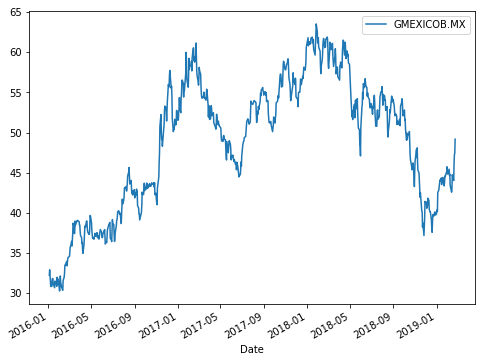

In [5]:
closes.plot(figsize=(8,6))

In [9]:
ret=np.log(closes/closes.shift()).dropna()
#prueba normalidad
stats.jarque_bera(ret)

(15.320579554616115, 0.000471170856389147)

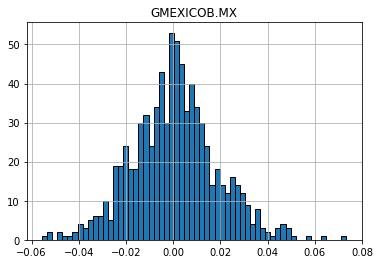

In [10]:
plt.title('GMEXICOB.MX')
plt.hist(ret['GMEXICOB.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

In [8]:
a2016=ret.iloc[0:251,]
a2017=ret.iloc[251:502,]
a2018=ret.iloc[502:753,]

### Cambios en los precios


<div class=text-justify> La gráfica inicia con una tendencia positva, con algunos incrementos muy marcados, esto llega hasta inicios del 2017. Inicia un periodo con tendencia negativa que termina a finales del 2017. Luego aumenta el precio de nuevo hasta inicios del 2018. El precio cae hasta 40 para inicar de nuevo un crecimiento positivo. </div>

In [11]:
ret_sum=pd.DataFrame(index=['Rend diario','Rend anual','Vol diaria','Vol anual'],columns=['2016','2017','2018','Todo'])
list=[a2016,a2017,a2018,ret]
for x in range (0,4):
    ret_sum.loc['Rend diario'][ret_sum.columns[x]]=list[x]['GMEXICOB.MX'].mean()
    ret_sum.loc['Rend anual'][ret_sum.columns[x]]=list[x]['GMEXICOB.MX'].mean()*252
    ret_sum.loc['Vol diaria'][ret_sum.columns[x]]=list[x]['GMEXICOB.MX'].std()
    ret_sum.loc['Vol anual'][ret_sum.columns[x]]=list[x]['GMEXICOB.MX'].std()*np.sqrt(252)
ret_sum

,2016,2017,2018,Todo
Rend diario,0.00187183,0.00064463,-0.00167537,0.000534832
Rend anual,0.471702,0.162447,-0.422194,0.134778
Vol diaria,0.0188261,0.0155574,0.0192354,0.0180412
Vol anual,0.298856,0.246967,0.305353,0.286396


### Discusión datos tabla


<div class=text-justify> 2016 muestra un rendimento anual bastante alto en comparación a los otros dos años. 2018 arroja resultados de rendimeintso negativos tanto diarios como anuales. Considerando este periodo, el rendimiento anual es de .17, con volatilidad de .28  </div>

In [13]:
ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ticker)
ret_sum.loc['Mean']=a2018.mean()
ret_sum.loc['Volatility']=a2018.std()
n=1000
for x in range (0,3):
    mu= ret_sum['GMEXICOB.MX']['Mean']
    sigma= ret_sum['GMEXICOB.MX']['Volatility']
    s0=49.17
    listaepsilon = [np.random.randn() for _ in range(n)]
    epsilons = np.asarray(listaepsilon)
    epsilon = pd.DataFrame(columns = ['Epsilon', 'st1','st10','st30','st252'])
    epsilon['Epsilon']= epsilons
    epsilon['st1']= s0*np.exp((mu*.5*sigma**2)*1+sigma*np.sqrt(1)*epsilons)
    epsilon['st10']= s0*np.exp((mu*.5*sigma**2)*10+sigma*np.sqrt(10)*epsilons)
    epsilon['st30']= s0*np.exp((mu*.5*sigma**2)*30+sigma*np.sqrt(30)*epsilons)
    epsilon['st252']= s0*np.exp((mu*.5*sigma**2)*252+sigma*np.sqrt(252)*epsilons)
    st=pd.DataFrame(index=['Mean','liminf','limsup'],columns=epsilon.columns)
    st.loc['Mean']=epsilon.mean()
    st.loc['liminf']=epsilon.min()
    st.loc['limsup']=epsilon.max()
    st=st.drop('Epsilon',1)
    print(st)
    n=n*10

            st1     st10     st30    st252
Mean    49.1433  49.1461  49.2407  50.8478
liminf   46.218  40.4267  35.0283     18.4
limsup  51.9704  58.5828  66.5971  118.451
            st1     st10     st30    st252
Mean     49.187  49.2869  49.4903  51.6866
liminf   45.451  38.3431  31.9605  14.1075
limsup  53.1148  62.7601  75.0355   167.38
            st1     st10     st30    st252
Mean    49.1803  49.2646  49.4491  51.5226
liminf  45.1225  37.4734  30.7154  12.5728
limsup  53.2083  63.1102   75.762  172.121
